# Question 6

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load grayscale image
img = cv2.imread("Image1_gray.jpg", cv2.IMREAD_GRAYSCALE)

M, N = img.shape
total_pixels = M*N
   
hist = [0]*256
PDF = [0]*256
    
for i in range(M):
    for j in range(N):
        intensity = img[i][j]
        hist[intensity]  += 1
        
for i in range(256):
    PDF[i] = hist[i]/total_pixels

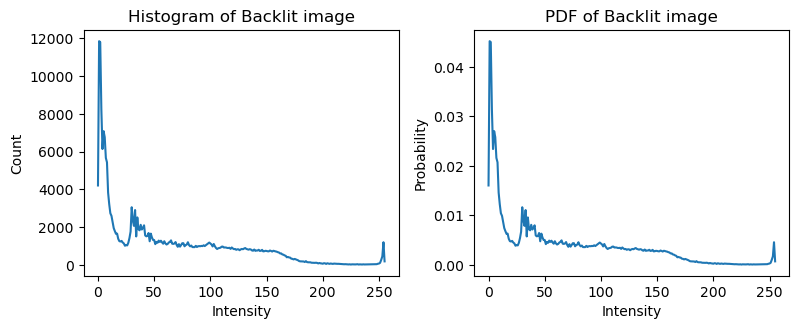

In [3]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
plt.plot(hist)
plt.xlabel("Intensity")
plt.ylabel("Count")
plt.title("Histogram of Backlit image")

plt.subplot(2,3,2)
plt.plot(PDF)
plt.xlabel("Intensity")
plt.ylabel("Probability")
plt.title("PDF of Backlit image")

plt.tight_layout()
plt.show()

In [4]:
CDF = np.cumsum(PDF)

# Find thresholds based on cumulative probability
r1 = np.searchsorted(CDF, 0.30)   # Dark region threshold
r2 = np.searchsorted(CDF, 0.70)   # Bright region threshold

print("Dark threshold (r1):", r1)
print("Bright threshold (r2):", r2)

s1 = 256*0.3
s2 = 256*0.7

#r1 = 10
#r2 = 60

Dark threshold (r1): 12
Bright threshold (r2): 87


In [5]:
def modify_region1(input_intensity):
    const = s1 / np.log10(1 + r1)
    return const * np.log10(1 + input_intensity)

def modify_region2(input_intensity):
    return s1 + (s2 - s1) * (input_intensity - r1) / (r2 - r1)

def modify_region3(input_intensity):
    # Normalize input to [0,1] within bright region
    r_norm = (input_intensity - r2) / (255 - r2)
    
    # Inverse-log (exponential) transform
    s_norm = np.exp(r_norm) - 1
    s_norm = s_norm / (np.exp(1) - 1)
    
    # Scale to output range [s2, 255]
    return s2 + s_norm * (255 - s2)

img_new = np.zeros_like(img, dtype=np.float32)

S_output = [0]*256

for i in range(M):
    for j in range(N):
        intensity = img[i][j]

        if intensity <= r1:
            img_new[i][j] = modify_region1(intensity)

        elif intensity >= r2:
            img_new[i][j] = modify_region3(intensity)

        else:
            img_new[i][j] = modify_region2(intensity)
            
for i in range(256):
    intensity = i

    if intensity <= r1:
        S_output[i] = modify_region1(intensity)

    elif intensity >= r2:
        S_output[i] = modify_region3(intensity)

    else:
        S_output[i] = modify_region2(intensity)

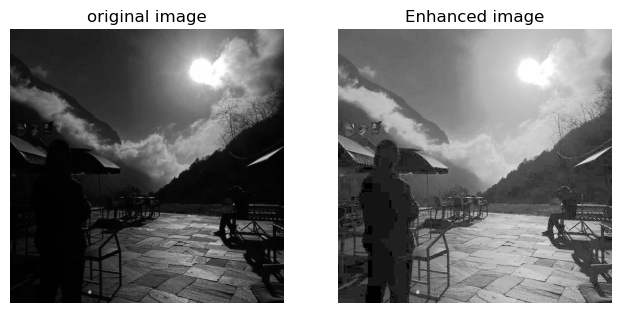

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.title("original image")
plt.subplot(1,3,2)
plt.imshow(img_new, cmap='gray')
plt.axis("off")
plt.title("Enhanced image")
plt.show()


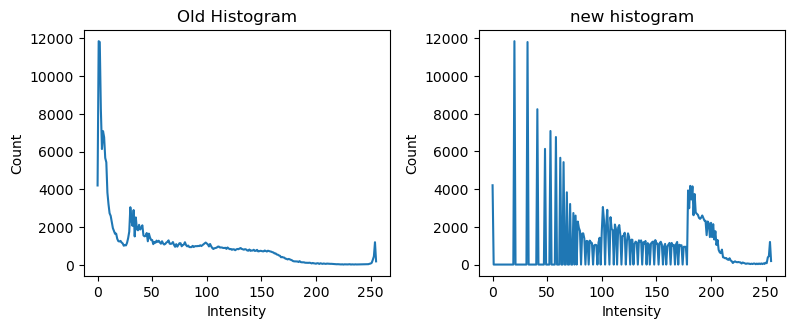

In [7]:
hist_new = [0]*256

for i in range(M):
    for j in range(N):
        image_intensity = int(img_new[i][j] *1)
        hist_new[image_intensity] += 1

plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
plt.plot(hist)
plt.xlabel("Intensity")
plt.ylabel("Count")
plt.title("Old Histogram")

plt.subplot(2,3,2)
plt.plot(hist_new)
plt.xlabel("Intensity")
plt.ylabel("Count")
plt.title("new histogram")

plt.tight_layout()
plt.show()

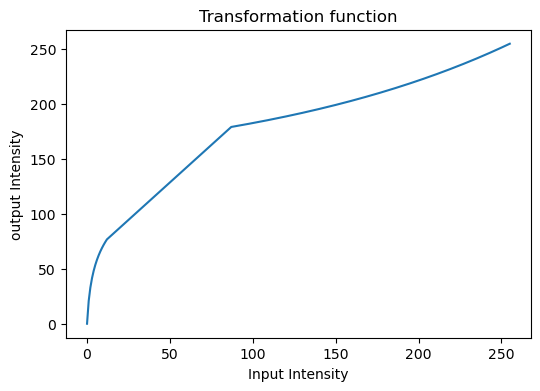

In [8]:
plt.figure(figsize=(6,4))
plt.plot(S_output)
plt.xlabel("Input Intensity")
plt.ylabel("output Intensity")
plt.title("Transformation function")
plt.show()